In [73]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
try:
    from run import *
except:
    pass

sns.set_style('whitegrid')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline 

In [92]:
news=pd.read_csv('OnlineNewsPopularity.csv')

In [133]:
# Check for missing values # 

missing=tab_missing_values(news)

# No missing values found # 
missing[missing['missing_count']>0]



,column_name,missing_count,filling_factor


In [93]:
# Need to clean up the column headers because of some empty spaces # 

news.columns=[a.replace(' ','') for a in news_df.columns]

# Question Requirements # 

Just to recap on Edo's questions, he wanted us to first: 

1. Perform the EDA

2. What features are more correlated with the target variable (we're interested in linear relationship, monotonic relationship and non linear/monotonic relationship [e.g. a "circular" relationship, in this case a qualitative analysis is good enough, since a qualitative analysis is complex to do])?

3. Try to build the best model with max 5 features (select them by running EDA). Run a proper evaluation with cross validation, analysis of the residuals, analysis of the coefficients, etc. Try the different models we studied (lasso, ridge, etc.) and play with their parameters to try to improve the performances.


** Zach's Comment: I take this to mean that we should be relying on our basic intuition and business sense of what makes a good, shareable article to build an initial model, rather than just putting all features in and "brute force" our way through.**

# Exploratory Data Analysis # 

The feature set looks intimidating with 61 columns, but there are a lot of features that are repeated and are dummies. 

For instance, columns 13 to 18 are dummies for channel type; columns 19 to 27 are avg, min max of best and worst performing keywords, 28 to 30 are avg,min,max shares of referenced articles, 31 to 38 are day of the week dummies, 39 to 43 are topic measures. (LDA is method for doing topic modelling, ie. sorting content into topic clusters automatically), 44-59 deal with the subjectivity, polarity and sentiment of the content. 

Here's a simple table I found which provides a good explanation for the data.

<img src="data.png",height="800",width="900"> </img>



## Here are some questions I thought we could explore: ##

* On which day of the week are articles most likely to be published? 
* Which kind of articles are most likely to be published? 
* What's the relationship between length of title/content and number of shares? 
* Is there a relationship between the number of shares and number of outbound links? 
* Does polarity, subjectivity and sentiment mean the same thing? 
* Do polarity/subjectivity/sentiment influence shareability? 

I thought we could try and do some quick visuals for these questions, I'll mark them with a #TODO below. I don't think we can go down the usual approach of just doing `sns.pairplot(df)` cos there are 61 columns and it looks stupid. So maybe gotta break the data down into chunks. 

In [ ]:
# TODO 1 - Barplot of count of articles by day #


In [ ]:
# TODO 2 - Barplot of count of articles by channel # 

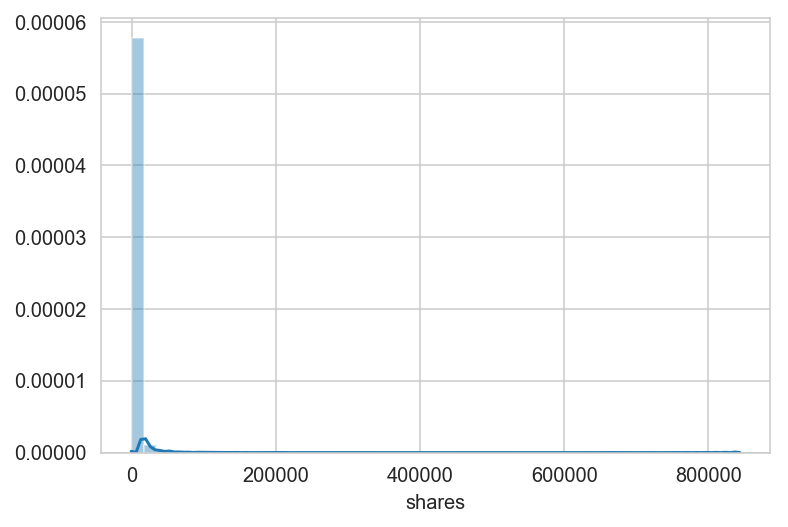

In [100]:
# Take a look at shares distribution as target variable # 
# Distribution is highly skewed, so consider taking log of shares before you visualise! #  

sns.distplot(news.shares)

In [ ]:
## Generate log shares ## 
log_shares=np.log10(news.shares)
news['log_shares']=log_shares

In [ ]:
# TODO 2 - Scatterplot/pairplot, n_tokens vs shares # 

In [ ]:
# TODO 3 - Scatterplot/pairplot, num_hrefs vs shares #

In [ ]:
# TODO 4 - Correlation heatmap, columns 44 to 59 # 

In [ ]:
# TODO 5 - Pairplot, columns 44 to 60 # 

In [ ]:
# Top 10 correlated features with shares #

corr_ranking=news.corr().abs().unstack()['shares'].sort_values(ascending=False)
corr_ranking.head(11)

# Feature Engineering # 

Can consider doing the following to create some variables in the feature set: 

* Does an article have any images or videos to engage the audience?

In [138]:
# New Features #

## Collapse the dummy variables into categorical for easier plotting ##  

### Days of the week article was published ###
days=news[['weekday_is_monday','weekday_is_tuesday','weekday_is_wednesday','weekday_is_thursday','weekday_is_friday','weekday_is_saturday','weekday_is_sunday']]
days.columns=['Mon','Tues','Weds','Thurs','Fri','Sat','Sun']
day=pd.Series(days.columns[np.where(days!=0)[1]])

### Channels/Genre of Content ### 
channels=news[['data_channel_is_bus','data_channel_is_entertainment','data_channel_is_socmed','data_channel_is_tech','data_channel_is_lifestyle','data_channel_is_world']]
channels.columns=['Business','Entertainment','Social Media','Tech','Lifestyle','World']
channel=pd.Series(channels.columns[np.where(channels!=0)[1]])


## New df for easier plotting ## 

share_cat=pd.concat([news['shares'],news['log_shares'],day,channel,], axis=1)
share_cat.columns=['shares','log_shares','day','channel']


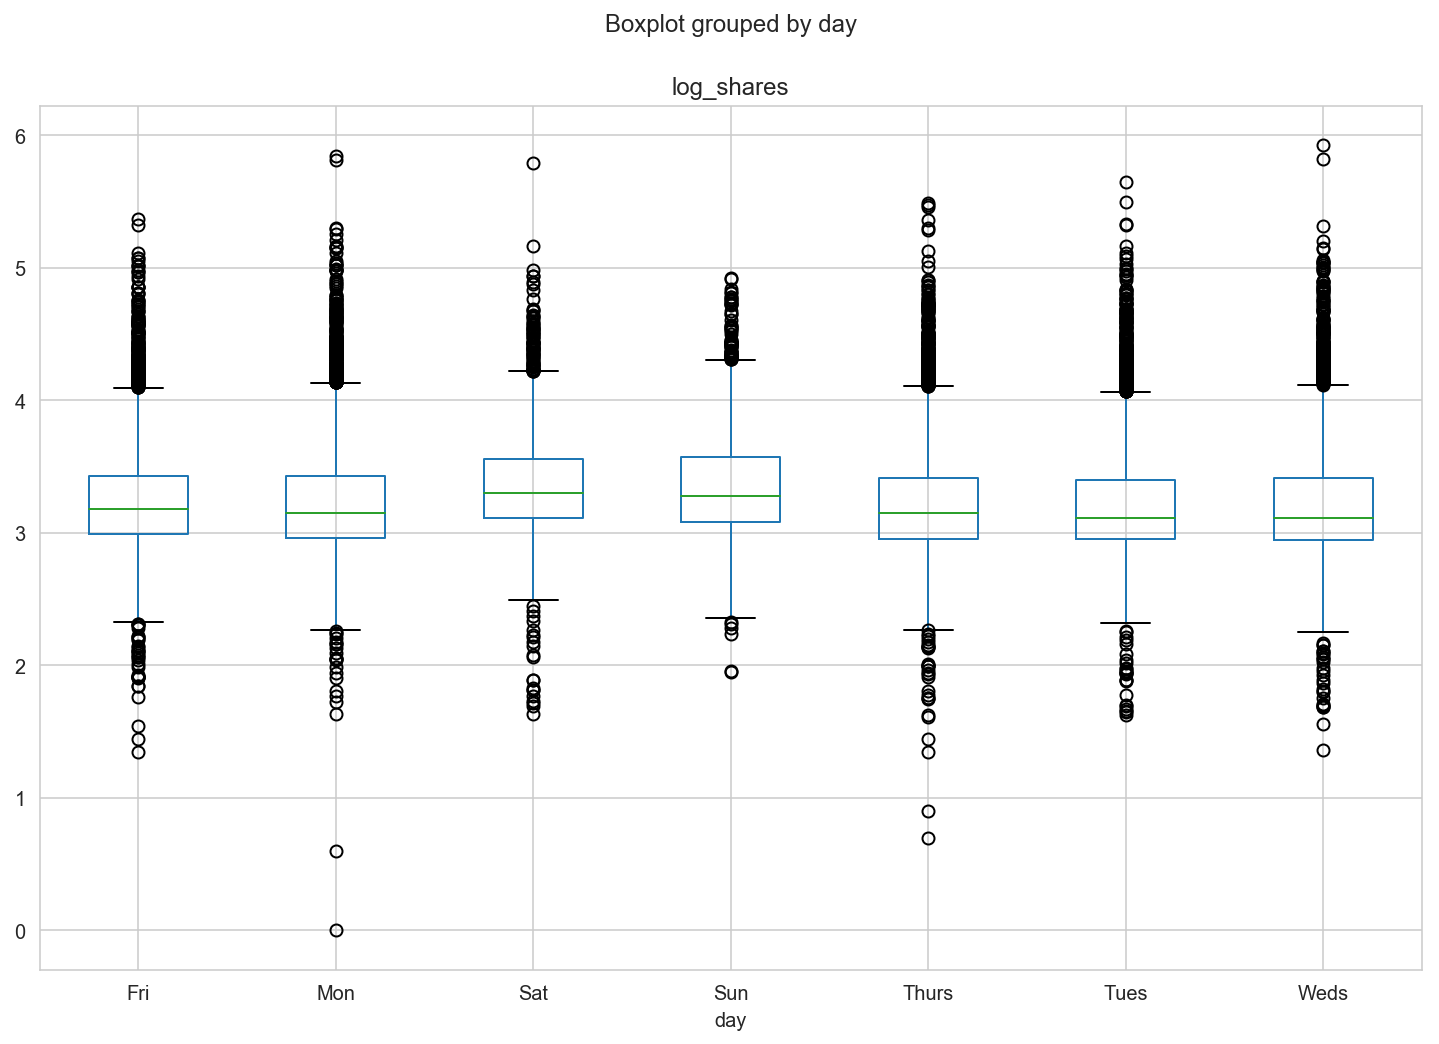

In [139]:
# Box plot of log shares by day # 

f, ax = plt.subplots(1,1,figsize=(12,8))
share_cat.boxplot(column='log_shares',by='day',ax=ax)

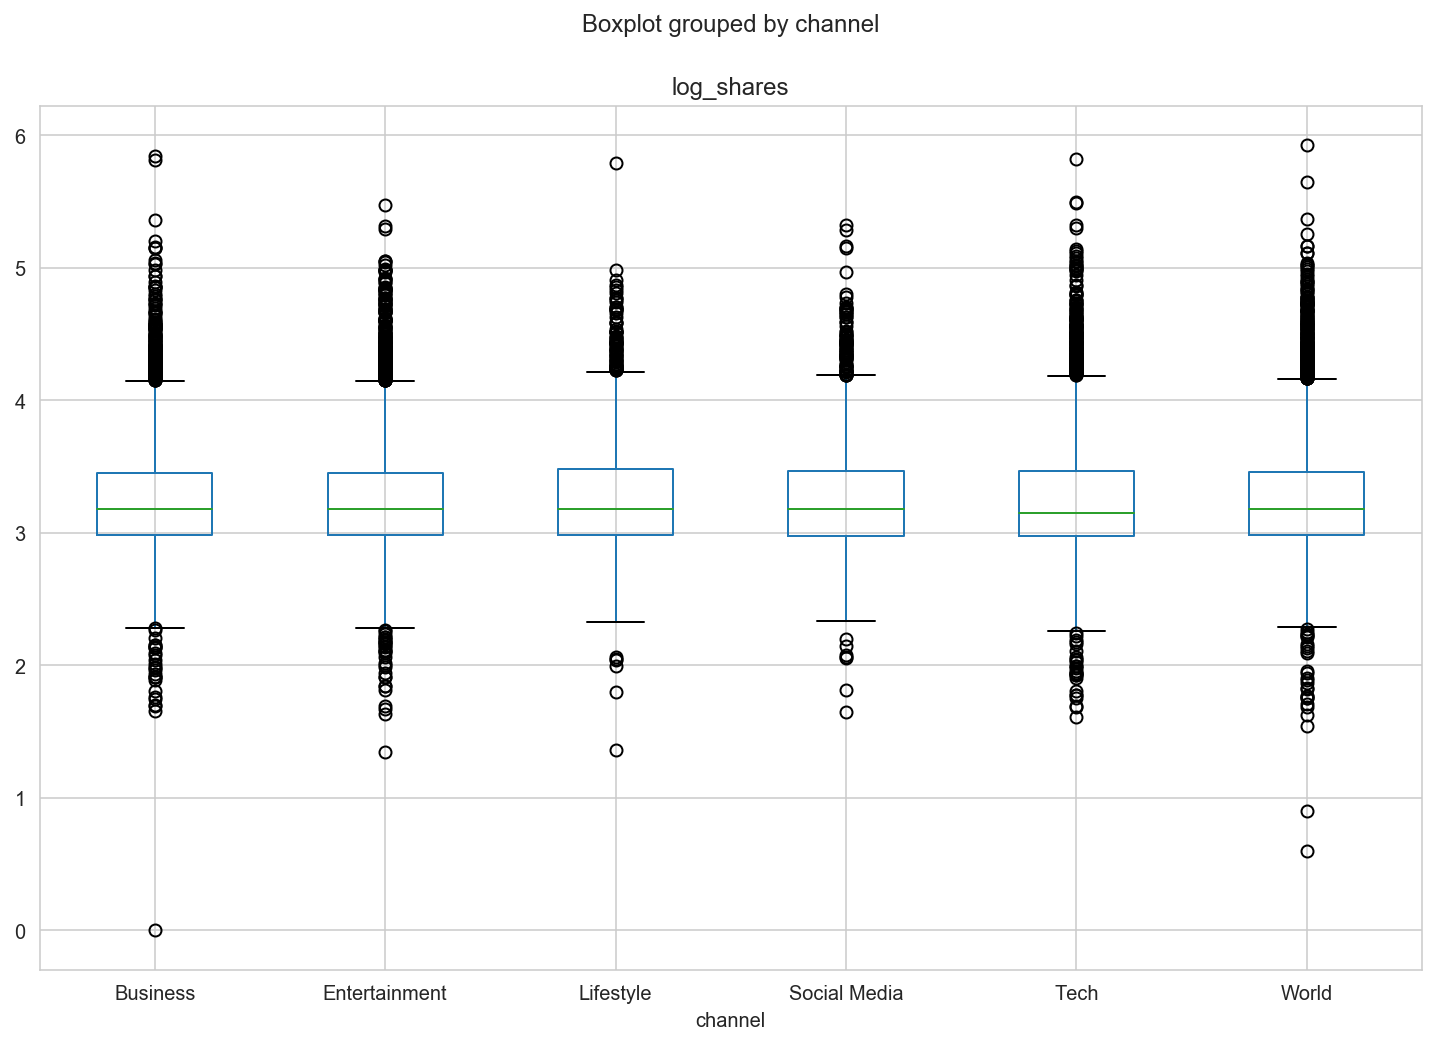

In [140]:
# Box plot of log shares by channel # 
f, ax = plt.subplots(1,1,figsize=(12,8))
share_cat.boxplot(column='log_shares',by='channel',ax=ax)

In [134]:
# Take a look at number of number of images# 
news.num_imgs.value_counts().head(10)

1.0     18119
0.0      6987
2.0      2965
3.0      1223
11.0     1125
10.0      860
4.0       668
12.0      601
6.0       571
9.0       546
Name: num_imgs, dtype: int64

In [ ]:
# TODO 6 - Create dummy for images or no images # 

# Modelling # 

**Candice and Hua Fong** try to work together to pick out 5-10 features your initial model! I think this mainly relies on some "common sense" knowledge of whether an article will be shared or not. I don't think the final answer is as important as the process in which we derived the results. Remember to use cross val, scaling and all that fun stuff we learnt in class. **Scaling** seems especially important because all the features look really skewed. MinMax would be good to bring it in line with the `rate` features. 

**Initha**, if you're using lasso/ridge, **PLEASE REMEMBER TO NOT INCLUDE ALL DUMMIES** for the day and the category variables otherwise you'll run into collinearity. Please also check the correlation for the very similar metrics, eg. sentiment vs polarity or polarity vs subjectivity. 